# Use Of PorterStemmer And TFIDF Vectorizer

In [114]:
import nltk
import pandas as pd
import numpy as np
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import sklearn.metrics as m
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [115]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [116]:
df=pd.read_csv('/content/drive/MyDrive/DataSets/spam.csv',encoding='latin')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


**There is no nltk.download () for porter stemmer since it is inbuilt in natural language toolkit**

In [117]:
df['v2'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5572 entries, 0 to 5571
Series name: v2
Non-Null Count  Dtype 
--------------  ----- 
5572 non-null   object
dtypes: object(1)
memory usage: 43.7+ KB


In [118]:
df['v1'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5572 entries, 0 to 5571
Series name: v1
Non-Null Count  Dtype 
--------------  ----- 
5572 non-null   object
dtypes: object(1)
memory usage: 43.7+ KB


In [119]:
df.rename(columns={'v1':'label','v2':'text'},inplace=True)

In [120]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

# Label Encoding

This is giving the labels spam and ham a categorical label of either 0 or 1

In [121]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['label']=le.fit_transform(df['label'])

In [122]:
df['label'].value_counts()

,count
label,
0,4825
1,747


In [123]:
import re

In [124]:
len(set(stopwords.words('english')))

198

In [125]:
df['text']

,text
0,"Go until jurong point, crazy.. Available only ..."
1,Ok lar... Joking wif u oni...
2,Free entry in 2 a wkly comp to win FA Cup fina...
3,U dun say so early hor... U c already then say...
4,"Nah I don't think he goes to usf, he lives aro..."
...,...
5567,This is the 2nd time we have tried 2 contact u...
5568,Will Ì_ b going to esplanade fr home?
5569,"Pity, * was in mood for that. So...any other s..."
5570,The guy did some bitching but I acted like i'd...


In [126]:
stemmer=PorterStemmer()


In [127]:
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [128]:
cleaned_text=[]
for text in df['text']:
  senti=re.sub('[^A-Za-z]',' ',text)
  senti=senti.lower()
  words=word_tokenize(senti)
  word=[stemmer.stem(i) for i in words if i not in stopwords.words('english')]
  senti=' '.join(word)
  cleaned_text.append(senti)


In [129]:
cleaned_text

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner valu network custom select receivea prize reward claim call claim code kl valid hour',
 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free',
 'gon na home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash pound txt csh send cost p day day tsandc appli repli hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw',
 'search right word thank breathe

# TF-IDF Vectorizer

This turns words into vectors for computational understanding based on each term appearance over the total number of words in the whole dataset

The max_features parameter picks the top words as specified leaving the most unique word which dont add much value

In [130]:
tfidf=TfidfVectorizer(max_features=5000)

In [131]:
features=tfidf.fit_transform(cleaned_text)

In [132]:
vectorized_features=features.toarray()

In [133]:
vectorized_features

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [134]:
#This displays the unique names
tfidf.get_feature_names_out()

array(['aah', 'aathi', 'abbey', ..., 'zed', 'zindgi', 'zoe'], dtype=object)

In [135]:
len(tfidf.get_feature_names_out())

5000

## Implementation of SMOTE(synthetic minority oversampling technique)

In [136]:
!pip install imbalanced-Learn

In [137]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split


vectorized_features_train,vectorized_features_test,label_train,label_test=train_test_split(vectorized_features,df['label'],test_size=0.2,random_state=7)
smote = SMOTE(random_state=7)
X_train_smote, y_train_smote = smote.fit_resample(vectorized_features_train, label_train)


# Machine Learning Model Building


---

The ML Models Used Include:

1. Multinomial Naive Bayes  

2.   Logistic Regression
3.   Support Vector Machines
2.   Decision Tree Classifier



# Multinomial Naive Bayes

*   This Algorithm is used in text classification where word frequency is taken and its probability is calculated according to its classification
*   An Assumption is made that evey word is independent despite the context of the given text



In [138]:
model=MultinomialNB()
model.fit(X_train_smote,y_train_smote)
y_pred=model.predict(vectorized_features_test)


In [139]:
accuracy_mnb=m.accuracy_score(label_test,y_pred)

In [140]:
#Confusion Matrix
cm=m.confusion_matrix(label_test,y_pred)
cm


array([[943,  27],
       [  6, 139]])

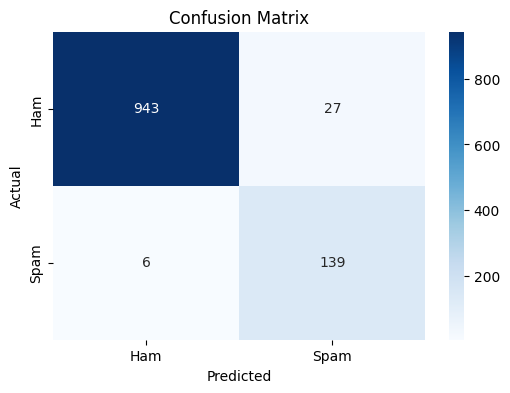

In [141]:
import seaborn as sns
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Support Vector Machines


In [142]:
model=SVC(kernel='linear')
model.fit(X_train_smote,y_train_smote)


SVC(kernel='linear')

In [143]:
y_pred=model.predict(vectorized_features_test)

In [144]:
accuracy_svm=m.accuracy_score(label_test,y_pred)

In [145]:
cm_svm=confusion_matrix(label_test,y_pred)
cm_svm

array([[965,   5],
       [ 13, 132]])

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

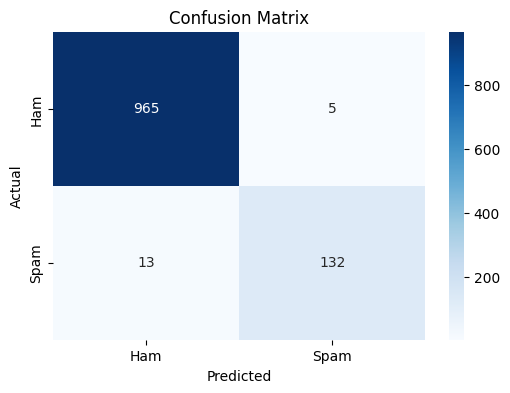

In [146]:
plt.figure(figsize=(6,4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt

# Logistic Regression

In [147]:
model=LogisticRegression()
model.fit(X_train_smote,y_train_smote)

LogisticRegression()

In [148]:
y_pred=model.predict(vectorized_features_test)

In [149]:
accuracy_lr=m.accuracy_score(label_test,y_pred)

In [150]:
cm_lr=confusion_matrix(label_test,y_pred)
cm_lr

array([[959,  11],
       [ 10, 135]])

Text(45.722222222222214, 0.5, 'Actual')

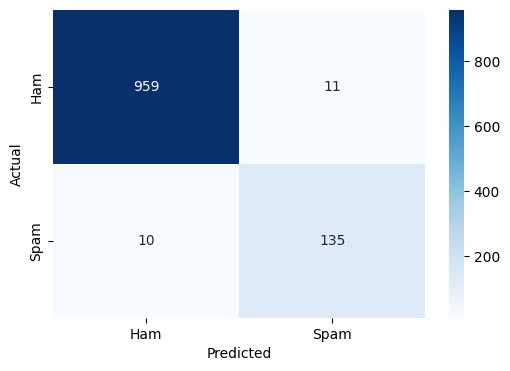

In [151]:
plt.figure(figsize=(6,4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')

# DecisionTree Classifier

In [152]:
model=DecisionTreeClassifier()
model.fit(X_train_smote,y_train_smote)

DecisionTreeClassifier()

In [153]:
y_pred=model.predict(vectorized_features_test)

In [154]:
accuracy_dt=m.accuracy_score(label_test,y_pred)

In [155]:
cm_dt=confusion_matrix(label_test,y_pred)
cm_dt

array([[944,  26],
       [ 18, 127]])

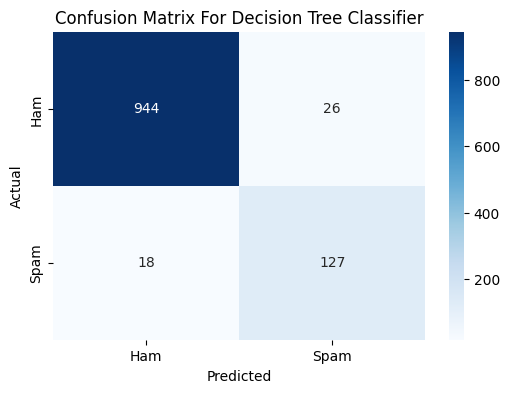

In [156]:
plt.figure(figsize=(6,4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix For Decision Tree Classifier')
plt.show()

In [157]:
results = [
    ("Logistic Regression", accuracy_lr),
    ("Naive Bayes", accuracy_mnb),
    ("SVM", accuracy_svm),
    ("Decision Tree", accuracy_dt),
]

# Convert to DataFrame for display
results_df = pd.DataFrame(results, columns=["Model", "Accuracy"])
results_df = results_df.sort_values(by="Accuracy", ascending=False)


In [158]:
results_df.head(5)

,Model,Accuracy
2,SVM,0.983857
0,Logistic Regression,0.981166
1,Naive Bayes,0.970404
3,Decision Tree,0.960538
